# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [1]:
import pandas as pd

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [2]:
first = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv")
second = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv")

merge_data = pd.concat([first, second])


merge_data

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139753,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0
139754,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0
139755,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN
139756,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [3]:
fips = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv")
station = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv")
station['FIPS 10-4'] = station['ID'].str[0:2]
df = pd.merge(station, fips, on = ['FIPS 10-4'])
df = pd.merge(df, merge_data, on = ['ID'])
df = df.drop(['FIPS 10-4', 'ISO 3166','STNELEV'], axis = 1)
df = df.sort_values('Year')
df = df.set_index(keys = ['NAME','ID', 'LATITUDE', 'LONGITUDE','Name', 'Year'])
df = df.stack()
df = df.reset_index()
df = df.rename(columns={"level_6":"Month", 0:"Temp", 'Name':"Country"})
df["Month"] = df["Month"].str[5:].astype(int)
df['Temp'] = df['Temp'] / 100
df

,NAME,ID,LATITUDE,LONGITUDE,Country,Year,Month,Temp
0,CHASKA,USC00211465,44.8,-93.5833,United States,1901,1,-10.07
1,CHASKA,USC00211465,44.8,-93.5833,United States,1901,2,-11.57
2,CHASKA,USC00211465,44.8,-93.5833,United States,1901,3,-2.07
3,CHASKA,USC00211465,44.8,-93.5833,United States,1901,4,9.63
4,CHASKA,USC00211465,44.8,-93.5833,United States,1901,5,15.43
...,...,...,...,...,...,...,...,...
1899682,MORELIAMICH,MXM00076665,19.7,-101.1830,Mexico,2020,8,19.80
1899683,MORELIAMICH,MXM00076665,19.7,-101.1830,Mexico,2020,9,20.30
1899684,MORELIAMICH,MXM00076665,19.7,-101.1830,Mexico,2020,10,19.75
1899685,MORELIAMICH,MXM00076665,19.7,-101.1830,Mexico,2020,11,18.55


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [4]:
def query_climate(df, country, year_begin, year_end, month):
    new_df = df[df["Country"] == country]
    new_df = new_df.drop('ID', axis = 1)
    new_df = new_df[new_df['Year'] <= year_end]
    new_df = new_df[new_df['Year'] >= year_begin]
    new_df = new_df[new_df['Month'] == month]
    return new_df

Run this example and check if you get the correct result, your obtained dataframe looks like:

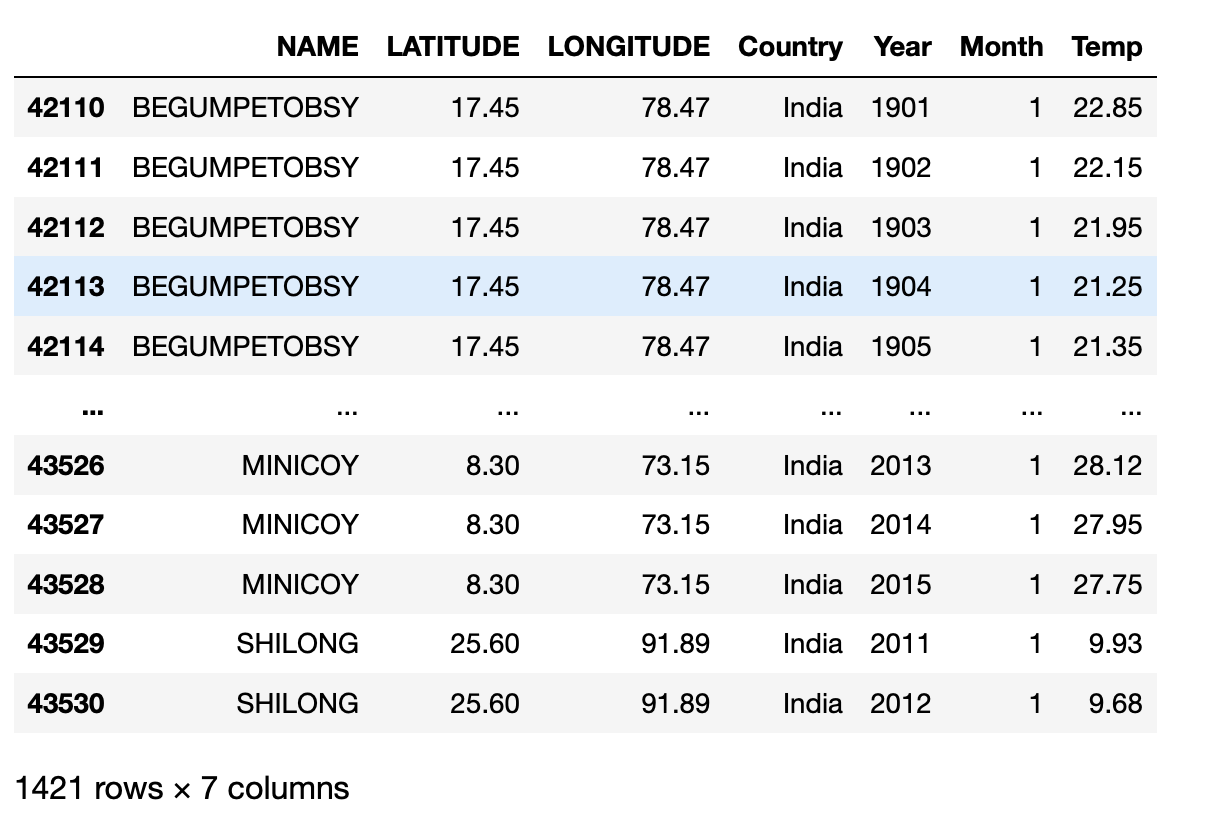

In [5]:
# the passing dataframe 'df' below is the dataframe you create in part 2
query_climate(df = df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
18528,SIBSAGAR,26.9800,94.630,India,1901,1,16.27
18540,MARMAGAO,15.4200,73.780,India,1901,1,25.50
18552,VIZAGAPATAM,17.7000,83.370,India,1901,1,24.33
18576,DARJEELING,27.0500,88.270,India,1901,1,4.20
19381,MT_ABU,24.6000,72.720,India,1901,1,12.83
...,...,...,...,...,...,...,...
1886440,GORAKHPUR,26.7500,83.367,India,2020,1,14.21
1890465,BAREILLY,28.3670,79.400,India,2020,1,12.85
1891402,VARANASI_BABATPUR,25.4500,82.867,India,2020,1,15.09
1896703,LUCKNOW_AMAUSI,26.7500,80.883,India,2020,1,13.79


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

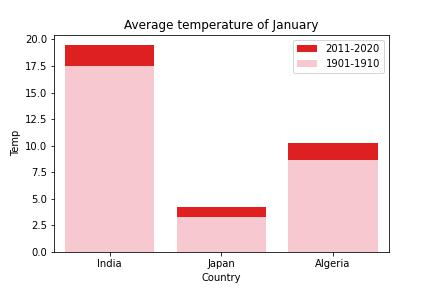

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

'\nConclusion:\nBased on the graph I created below, we can clearly see that the average temperature for most of the country, except\nChina, have increase from 1901 to 2011. As a result, we can savely conclude the the global warming is happenning and \nwill be increasingly severe.  \n'

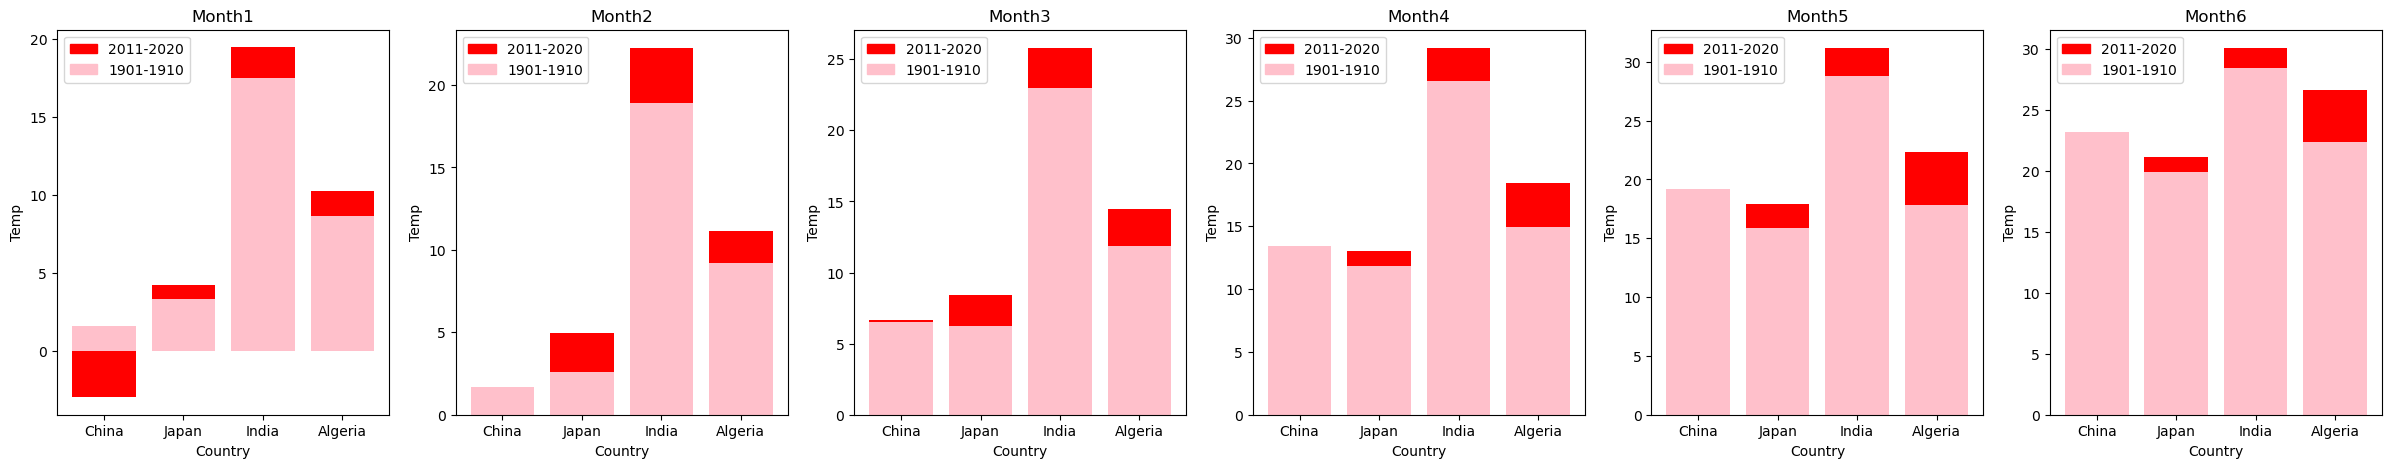

In [6]:
"""
For this question, I choose Jan, Feb, Mar, Apr, May and Jun for months and China, India, Korea and Japan for countries.
"""
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

def cal_average(df, country, month, year_begin, year_end):
    my_value = df[df['Country'] == country]
    my_value = my_value[(my_value['Month']==month) & (my_value['Year']>=year_begin) & (my_value['Year']<=year_end)]
    my_mean = my_value['Temp'].mean()
    return my_mean

my_df = pd.DataFrame()
my_df['Country'] = ['China', 'Japan','India', 'Algeria']
fig, ax = plt.subplots(1,6, figsize = (30,5))


for i in range(1,7):
    my_ave_c = cal_average(df, 'China', i, 1901, 1910)
    my_ave_j = cal_average(df, 'Japan', i, 1901, 1910)
    my_ave_i = cal_average(df, 'India', i, 1901, 1910)
    my_ave_a = cal_average(df, 'Algeria', i, 1901, 1910)

    my_ave_c_1 = cal_average(df, 'China', i, 2011, 2020)
    my_ave_j_1 = cal_average(df, 'Japan', i, 2011, 2020)
    my_ave_i_1 = cal_average(df, 'India', i, 2011, 2020)
    my_ave_a_1 = cal_average(df, 'Algeria', i, 2011, 2020)

    my_df['Temp_1901'] = [my_ave_c, my_ave_j, my_ave_i, my_ave_a]
    my_df['Temp_2011'] = [my_ave_c_1, my_ave_j_1, my_ave_i_1, my_ave_a_1]
    
    
    ax[i-1].bar(x = my_df['Country'], height=my_df['Temp_2011'], color = 'r')
    ax[i-1].bar(x = my_df['Country'], height=my_df['Temp_1901'], color = 'pink')
    ax[i-1].set(xlabel='Country', ylabel='Temp', title='Month'+str(i))
    patch1 = mpatches.Patch(color='red', label='2011-2020')
    patch2 = mpatches.Patch(color='pink', label='1901-1910')
    ax[i-1].legend(handles=[patch1, patch2])
    
    
"""
Conclusion:
Based on the graph I created below, we can clearly see that the average temperature for most of the country, except
China, have increase from 1901 to 2011. As a result, we can savely conclude the the global warming is happenning and 
will be increasingly severe.  
"""

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

'\nBased on these three graphs, we can clealy see a increase in temperature over the year in India and it happened\nthroughout the months. We have the biggest change happened in Feb with more than 3.25 C increase and the smallest\nchange happened in July with less than 1.75 C increase. But overall, India experienced a severe climate change\nover the years.\n'

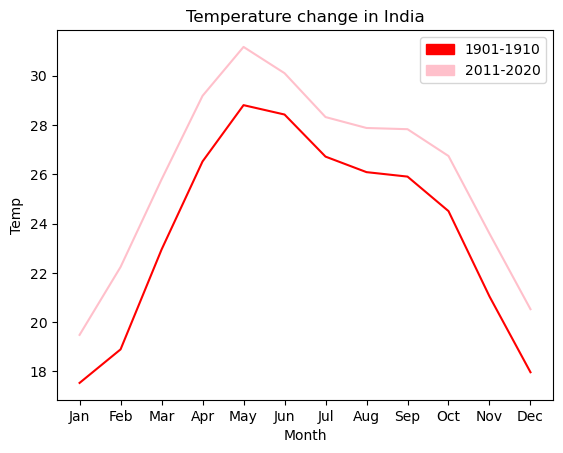

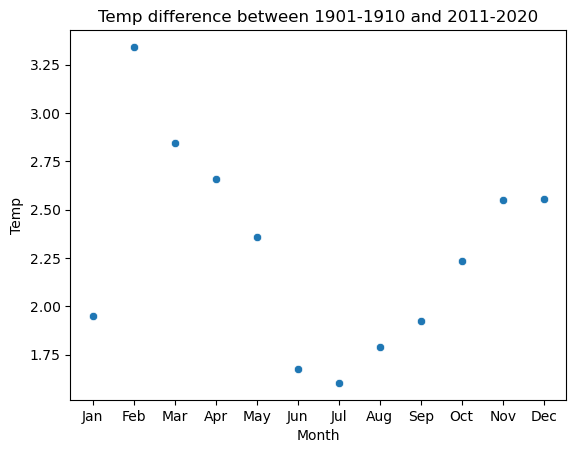

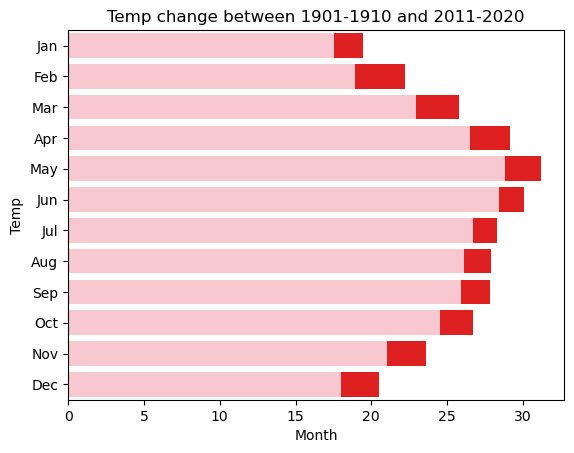

In [7]:
import seaborn as sns
"""
For the first graph, I will use the graph to explain which month has the biggest temperature change.
I choose India as the country
"""
fig, ax = plt.subplots(1)
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
my_list_1 = []
my_list_2 = []
for i in range(1,13):
    x = cal_average(df, 'India', i, 1901, 1910)
    y = cal_average(df, 'India', i, 2011, 2020)
    my_list_1.append(x)
    my_list_2.append(y)

"""
The first graph illustrate the temperature change in India amount different months. We can clearly see that
the temperature has significantly increased since 1901.
"""
ax = sns.lineplot(x = month, y = my_list_1, color='red')
ax = sns.lineplot(x = month, y = my_list_2, color='pink')
ax.set(xlabel = 'Month', ylabel = 'Temp', title = 'Temperature change in India')
patch1 = mpatches.Patch(color='red', label='1901-1910')
patch2 = mpatches.Patch(color='pink', label='2011-2020')
ax.legend(handles=[patch1, patch2])

    

fig, ax1 = plt.subplots(1)
"""
This second graph shows the difference for the temperature between 1901-1910 to 2011-2020. We can see that Feburary
has the biggest temperature difference and July has the smallest temperature difference.
"""
list_differ = []

for i in range(1,13):
    x = cal_average(df, 'India', i, 1901, 1910)
    y = cal_average(df, 'India', i, 2011, 2020)
    list_differ.append(y-x)
ax1 = sns.scatterplot(x=month, y=list_differ)
ax1.set(xlabel = 'Month', ylabel = 'Temp', title = 'Temp difference between 1901-1910 and 2011-2020')

fig, ax2 = plt.subplots(1)

"""
This graph change of temperature from 1901-1910 and 2011-2020 in January
"""

ax2 = sns.barplot(x=my_list_2, y=month, color='r')
ax2 = sns.barplot(x=my_list_1, y=month, color='pink')
ax2.set(xlabel = 'Month', ylabel = 'Temp', title = 'Temp change between 1901-1910 and 2011-2020')    


"""
Based on these three graphs, we can clealy see a increase in temperature over the year in India and it happened
throughout the months. We have the biggest change happened in Feb with more than 3.25 C increase and the smallest
change happened in July with less than 1.75 C increase. But overall, India experienced a severe climate change
over the years.
"""

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell

https://github.com/therealtimmy/HW/blob/ba39ef252fa0966aec88a1558c07e270de00122e/HW1.ipynb